In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

print("Libraries successfully imported.")

Libraries successfully imported.


In [12]:
# load data into pandas dataframe

df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocess

handle missing values, drop unused columns, etc

In [13]:
data = df.drop(['PassengerId',
                'Name',
                'Ticket',
                'Cabin',
                'SibSp',
                'Parch'], axis=1)
data['Age'] = data['Age'].fillna(data["Age"].mean())
data['Embarked'] = data['Embarked'].fillna('C')
print(data.isnull().sum())
data.describe()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64


,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,13.002015,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.910400
50%,0.000000,3.000000,29.699118,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [14]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X = data.drop('Survived', axis=1)
y = data['Survived']

numeric_features = ['Age', 'Fare']

numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown='ignore'))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Pclass', 'Sex', 'Embarked'])])

In [18]:
X_transformed = preprocessor.fit_transform(X)

# Building models

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report, ConfusionMatrixDisplay

## Logistic Regression

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Linear regression score: 0.7988826815642458
Linear regression f1 score: 0.7391304347826086
classification_report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



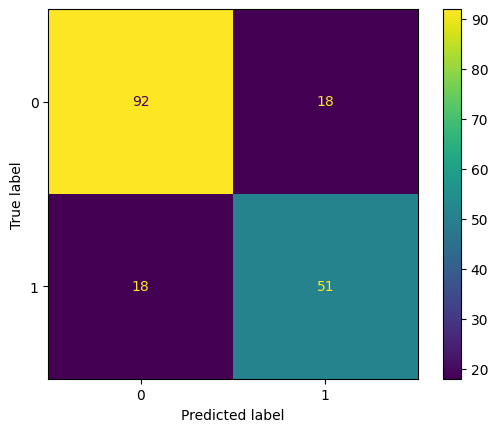

In [21]:
lr_pred = lr.predict(X_test)
lr_score = lr.score(X_test, y_test)
lr_f1 = f1_score(y_test, lr_pred)
lr_classification_report = classification_report(y_test, lr_pred)

print(f"Linear regression score: {lr_score}")
print(f"Linear regression f1 score: {lr_f1}")
print(f"classification_report:\n{lr_classification_report}")
lr_cm = confusion_matrix(y_test, lr_pred)
lr_disp = ConfusionMatrixDisplay(lr_cm)
lr_disp.plot()

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
mae = mean_absolute_error(y_test, lr_pred)
print(f"mean_absolute_error: {mae}")

mean_absolute_error: 0.2011173184357542


In [83]:
lr_result = pd.read_csv('lr_result.csv')
lr_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


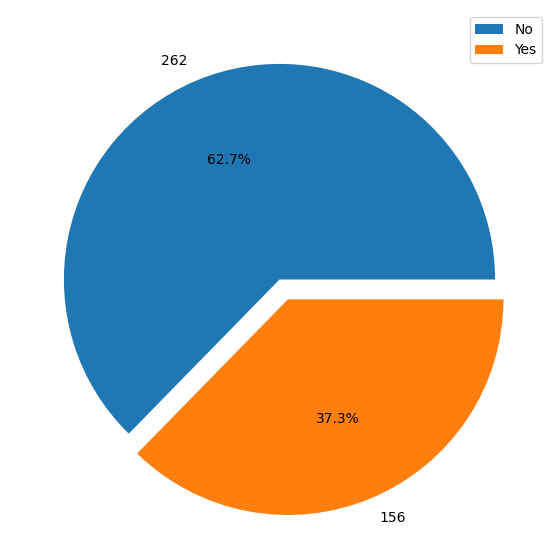

In [84]:
fig = plt.figure(figsize=(10,7))
survived =lr_result['Survived'].value_counts()
plt.pie(survived, labels=survived.values, explode=(0,0.1), autopct="%0.1f%%")
plt.legend(survived.index.map({0: "No", 1: "Yes"}), loc=1)

## Random Forest Classifier

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=0)


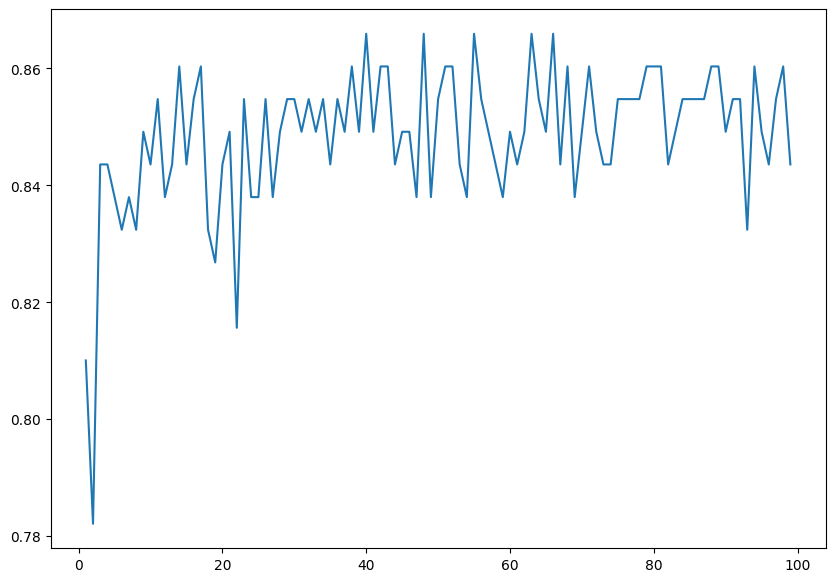

In [75]:
# find the best n_estimatorf for random forest classifier
n = range(1,100)
results = list()
for i in n:
    rfc_temp = RandomForestClassifier(n_estimators=i)
    rfc_temp.fit(X_train, y_train)
    results.append(rfc_temp.score(X_test, y_test))

fig = plt.figure(figsize=(10,7))
plt.plot(n, results)

In [81]:
results_pd = pd.DataFrame(results)
results_pd.to_csv("rfc_estimators.csv")

In [77]:
# find max index
results_np = np.array(results)
max_index = results_np.argmax()
print(f"best n_estimators: {max_index}")
print(f"score: {results_np.max()}")

rfc = RandomForestClassifier(n_estimators=max_index)

rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

best n_estimators: 39
score: 0.8659217877094972


Random forest classifier score: 0.8547486033519553
Random forest classifier f1 score: 0.803030303030303
classification_report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       110
           1       0.84      0.77      0.80        69

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



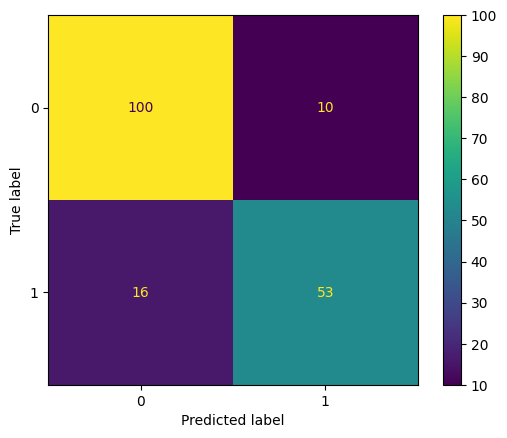

In [79]:
rfc_f1 = f1_score(y_test, rfc_pred)
rfc_score = rfc.score(X_test, y_test)
rfc_classification_report = classification_report(y_test, rfc_pred)

print(f"Random forest classifier score: {rfc_score}")
print(f"Random forest classifier f1 score: {rfc_f1}")
print(f"classification_report:\n{rfc_classification_report}")
rfc_cm = confusion_matrix(y_test, rfc_pred)
rfc_disp = ConfusionMatrixDisplay(rfc_cm)
rfc_disp.plot()

In [85]:
rfc_result = pd.read_csv("rfc_result.csv")
rfc_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


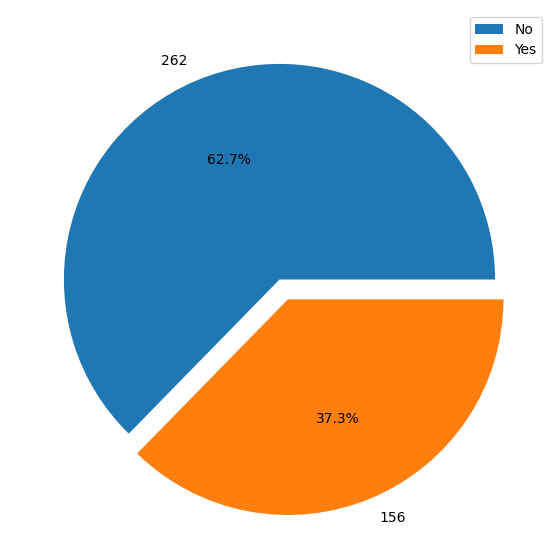

In [86]:
fig = plt.figure(figsize=(10,7))
survived =lr_result['Survived'].value_counts()
plt.pie(survived, labels=survived.values, explode=(0,0.1), autopct="%0.1f%%")
plt.legend(survived.index.map({0: "No", 1: "Yes"}), loc=1)